# First try to learn Logistic Regression with Neutral Network

        This is my implement of logistic regression with a neutral network. 

### Math and materials 

   All materials come from Andrew Y. Ng course.
   
   [COURSE](www.coursera.org/specializations/deep-learning)
    
### Dataset

   This is a dataset with sms spam collection from Kaggle competition 
   
   [LINK](https://www.kaggle.com/uciml/sms-spam-collection-dataset/data)
   The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.
   

## 1. Overview ##

First take a look on dataset, convert words to numerical expression
and change classifier to 0 when SMS is spam, 1 when SMS is ham.


In [0]:
# import useful package
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd 
import matplotlib.pyplot as plt 
from keras.preprocessing import sequence

%matplotlib inline

In [116]:
df = pd.read_csv('./Deep-Learning-/simple_NN-s/spam.csv', encoding= "ISO-8859-1")

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## 2. Clean data ##

1. Delete unnecessary columns
2. Change ham/spam to binary class
3. Convert chars into integers and select length of message

In [0]:
# Delete columns 
df = df.iloc[:,:2]

In [0]:
# Change ham/spam to binary class
df.columns = ["Class","Text"]
df['Class_bin'] = pd.factorize(df['Class'])[0]

In [0]:
# Convert chars into integers

def toInt(row):
    xn = [ord(x) for x in row['Text']]
    return xn

df['Text_int'] = df.apply(toInt, axis=1)

In [0]:
df['Amount_of_char'] = df['Text_int'].map(lambda x: len(x))

In [121]:
df.head()

,Class,Text,Class_bin,Text_int,Amount_of_char
0,ham,"Go until jurong point, crazy.. Available only ...",0,"[71, 111, 32, 117, 110, 116, 105, 108, 32, 106...",111
1,ham,Ok lar... Joking wif u oni...,0,"[79, 107, 32, 108, 97, 114, 46, 46, 46, 32, 74...",29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,"[70, 114, 101, 101, 32, 101, 110, 116, 114, 12...",155
3,ham,U dun say so early hor... U c already then say...,0,"[85, 32, 100, 117, 110, 32, 115, 97, 121, 32, ...",49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,"[78, 97, 104, 32, 73, 32, 100, 111, 110, 39, 1...",61


(array([3.700e+03, 1.735e+03, 7.900e+01, 3.500e+01, 1.400e+01, 3.000e+00,
        4.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([  2. ,  92.8, 183.6, 274.4, 365.2, 456. , 546.8, 637.6, 728.4,
        819.2, 910. ]),
 <a list of 10 Patch objects>)

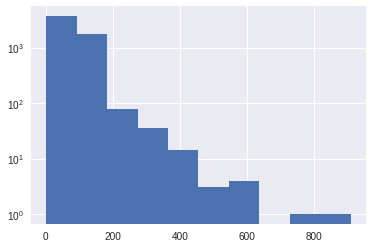

In [122]:
plt.hist(df['Amount_of_char'], log=True)

In [123]:
# Get max element from text
df['Max_of'] = df['Text_int'].map(lambda x: max(x))

print("Number of max value: ",df['Max_of'].max())

Number of max value:  247


In [0]:
X = df['Text_int'].values
y = df['Class_bin'].values

for i in range(len(df)):
    X[i] = np.asarray(X[i])

In [0]:
y = y.reshape(len(y),1)

In [126]:
y.shape

(5572, 1)

In [127]:
#check our message
print(''.join([chr(x) for x in X[0]]))
print("This message is:", y[0], "it's", df['Class'][0], "message")

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
This message is: [0] it's ham message


In [0]:
# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [0]:
# Change length of message to 100 chars
max_review_length = 60
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [0]:
X_train = X_train / 247
X_test = X_test / 247

In [131]:
#reshape all array
X_test = X_test.T
X_train = X_train.T
y_test = y_test.T
y_train = y_train.T


print ("X_train shape: " + str(X_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("y_test  shape: " + str(y_test.shape))

X_train shape: (60, 3900)
y_train shape: (1, 3900)
X_test shape: (60, 1672)
y_test  shape: (1, 1672)


## 3 - General Architecture of the learning algorithm ##

<img src="images/LogReg_mesage.jpg" style="width:650px;height:400px;">

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
In this exercise, I will carry out the following steps: 
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

## 4. Make helper function ##

First implement `sigmoid()`. $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$

In [0]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1/(1+np.exp(-z))

    return s

## Initializing parameters ##


In [0]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim, 1))
    b = float(0)

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

## Forward and backward propagation 

Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- Get X
- Compute $A = \sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$
- Calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas I will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [0]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T, X)+b)                                  # compute activation
    cost = (-1/m) * (Y*np.log(A) + (1-Y)*np.log(1-A)).sum()            # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = np.dot(X, (A-Y).T) / m
    db = 1/m * (A-Y).sum()

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

## Optimization ##

- Initialized Ours parameters.
- Compute a cost function and its gradient.
- Update the parameters using gradient descent.

The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [0]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w = w - learning_rate * dw
        b = b - learning_rate * db
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

## Predict ##

 Implement the `predict()` function. There is two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. 

In [0]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T, X) + b)
           
    # Convert probabilities A[0,i] to actual predictions p[0,i]
    Y_prediction = np.around(A, decimals=0)
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

# 5. Merge all function into a model 

In [0]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function We've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """

    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

### Test our data ###

In [138]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 3000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.492149
Cost after iteration 200: 0.438193
Cost after iteration 300: 0.417918
Cost after iteration 400: 0.407776
Cost after iteration 500: 0.401346
Cost after iteration 600: 0.396500
Cost after iteration 700: 0.392435
Cost after iteration 800: 0.388821
Cost after iteration 900: 0.385510
Cost after iteration 1000: 0.382432
Cost after iteration 1100: 0.379548
Cost after iteration 1200: 0.376834
Cost after iteration 1300: 0.374274
Cost after iteration 1400: 0.371856
Cost after iteration 1500: 0.369568
Cost after iteration 1600: 0.367401
Cost after iteration 1700: 0.365347
Cost after iteration 1800: 0.363397
Cost after iteration 1900: 0.361545
Cost after iteration 2000: 0.359784
Cost after iteration 2100: 0.358108
Cost after iteration 2200: 0.356511
Cost after iteration 2300: 0.354989
Cost after iteration 2400: 0.353536
Cost after iteration 2500: 0.352149
Cost after iteration 2600: 0.350823
Cost after iteration 2700: 0.349554
Cost